## Welcome to Jupyter Notebook

This is a Jupyter Notebook. It works just like python console, but you can freely go back and forth and reexecute pieces (cells) of code.

To run code press Shift+Enter

In [1]:
a = 2

In [3]:
a += 2

In [4]:
print a

6


I can do to the second cell and run it again and again making "a" bigger and bigger.

You can always reset the "state" of the notebook by doing "Kernel->Restart". You can also rerun all of the cells from the top, by doing "Cell->Run all". Try it now.

Jupyter allows you to run any bash command by using the exclamation mark "!":

In [5]:
!ls -al

total 16
drwxrwxr-x  3 vagrant vagrant 4096 Aug 29 20:54 .
drwxrwxr-x 18 vagrant vagrant 4096 Aug 29 20:50 ..
drwxr-xr-x  2 vagrant vagrant 4096 Aug 29 20:50 .ipynb_checkpoints
-rw-rw-r--  1 vagrant vagrant 1886 Aug 29 20:54 Untitled.ipynb


You can use variables defined in python in the bash calls using brackets "{}":

In [7]:
name = "Chris"
text = "My name is " + name
!echo "{text}" > test.txt
!cat test.txt

My name is Chris


It's easy to get help in the notebook - just follow a command with question mark '?'

In [73]:
int?

## Plotting

To plot data in python we are going to use matplotlib and seaborn.

In [1]:
import pylab as plt
import seaborn as sns

We'll nead numpy for generating some random data

In [3]:
import numpy as np

In [6]:
random_data = np.random.rand(10,10)
plt.plot(random_data)

Where is the plot?!? We need to explicitly tell notebookto put it inline

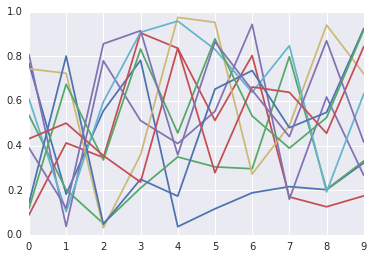

In [8]:
%matplotlib inline
plt.plot(random_data)

We can also plot a scatterplot

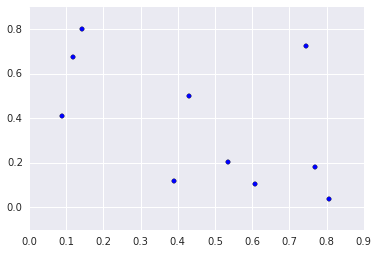

In [9]:
plt.scatter(random_data[0,:], random_data[1,:])

We can also plot an array:

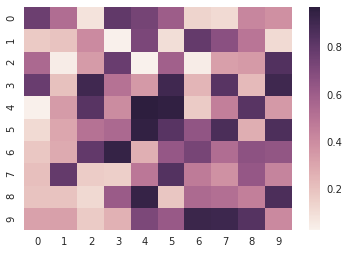

In [12]:
sns.heatmap(random_data)

Histograms

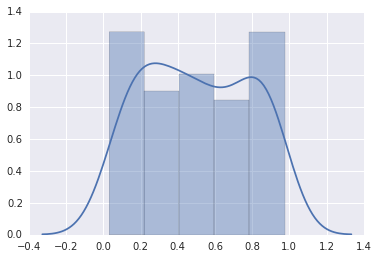

In [22]:
sns.distplot(random_data.ravel())

Task - sample data from a __normal__ distribution and plot it distribution

## Reading NIFTI files using nibabel

Nibabel is librabry for reading and writing to various neuroimaging data formats

In [24]:
import nibabel as nb

In [25]:
nii = nb.load("../../../data/ds003/sub001/BOLD/task001_run001/bold.nii.gz")

We can read shape and headers of a nifti file without loading it into memory

In [26]:
nii.shape

(64, 64, 33, 160)

In [29]:
header = nii.get_header()
header.get_xyzt_units()

('mm', 'sec')

In [30]:
nii.get_affine()

array([[ -3.125 ,   0.    ,   0.    ,  98.4375],
       [  0.    ,   3.125 ,   0.    , -98.4375],
       [  0.    ,   0.    ,   4.    , -64.    ],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

We can also get the data:

(64, 64, 33, 160)


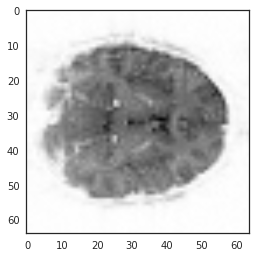

In [53]:
data = nii.get_data()
print data.shape
sns.set_style("white")
plt.imshow(data[:,:,10,1])

We can create new files

In [62]:
new_nii = nb.Nifti1Image(np.random.rand(*(nii.shape[:-1])), nii.get_affine())
new_nii.to_filename("/tmp/test.nii.gz")

In [63]:
!fslview /tmp/test.nii.gz

Task: load an anatomical scan from "../../../data/ds003/sub001/anatomy/inplane.nii.gz" threshold it and save the data back to a file in your home directory


## Image manipulation using nilearn

nilearn is a python package for doing machine learning in neuroimaging. We will primarly use it to plot and manipulate images

In [65]:
import nilearn.plotting, nilearn.image

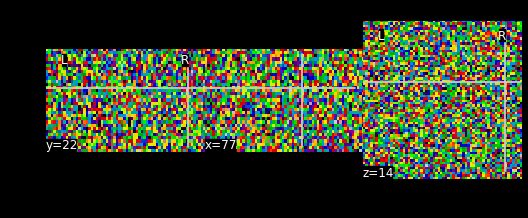

In [66]:
nilearn.plotting.plot_epi(new_nii)

In [67]:
nilearn.plotting.plot_epi(nii)

DimensionError: Data must be a 3D Niimg-like object but you provided a 4D image. See http://nilearn.github.io/building_blocks/manipulating_mr_images.html#niimg.

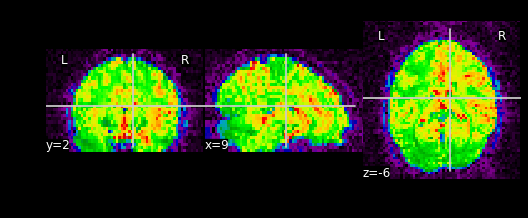

In [68]:
nilearn.plotting.plot_epi(nilearn.image.index_img(nii,0))

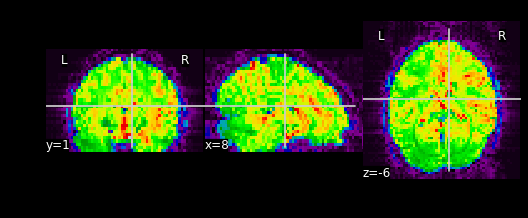

In [71]:
nilearn.plotting.plot_epi(nilearn.image.mean_img(nii))

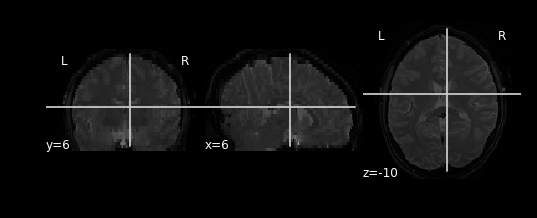

In [72]:
nilearn.plotting.plot_anat("../../../data/ds003/sub001/anatomy/inplane.nii.gz")

Task: explore plotting options - could you plot the anatomical image as a series of axial slices?

## Nipype

Nipype is a python library for interacting tith various neuroimaging programs. It's primarly used for constructing workflows taht are later executed on many subjects on a cluster. For this workshop we will primarly use it to cache results or commandlines

In [75]:
from nipype.caching import Memory
from nipype.interfaces import fsl
mem = Memory(base_dir='.')


In [79]:
fslmean = mem.cache(fsl.maths.MeanImage)
fslmean_results = fslmean(in_file="../../../data/ds003/sub001/BOLD/task001_run001/bold.nii.gz")
fslmean_results.outputs

INFO:workflow:Executing node 0a9b70b1b7f1a6ec61eb3745cd320506 in dir: /home/vagrant/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/0a9b70b1b7f1a6ec61eb3745cd320506
INFO:workflow:Collecting precomputed outputs



out_file = /home/vagrant/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/0a9b70b1b7f1a6ec61eb3745cd320506/bold_mean.nii.gz

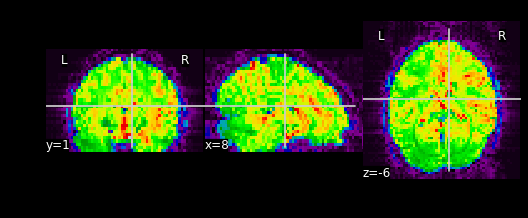

In [80]:
nilearn.plotting.plot_epi(fslmean_results.outputs.out_file)

Notice that if we run it again nothing get's recalculated - nipype will be smart enough to use the cache

In [81]:
fslmean_results = fslmean(in_file="../../../data/ds003/sub001/BOLD/task001_run001/bold.nii.gz")
fslmean_results.outputs

INFO:workflow:Executing node 0a9b70b1b7f1a6ec61eb3745cd320506 in dir: /home/vagrant/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/0a9b70b1b7f1a6ec61eb3745cd320506
INFO:workflow:Collecting precomputed outputs



out_file = /home/vagrant/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/0a9b70b1b7f1a6ec61eb3745cd320506/bold_mean.nii.gz

But if we change the inputs new calculation will be triggered

In [83]:
fslmean_results = fslmean(in_file="../../../data/ds003/sub003/BOLD/task001_run001/bold.nii.gz")
fslmean_results.outputs

INFO:workflow:Executing node 75077e18c9a5c60b613cdf27af4c0b6d in dir: /home/vagrant/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/75077e18c9a5c60b613cdf27af4c0b6d
INFO:workflow:Running: fslmaths /home/vagrant/data/ds003/sub003/BOLD/task001_run001/bold.nii.gz -Tmean /home/vagrant/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/75077e18c9a5c60b613cdf27af4c0b6d/bold_mean.nii.gz



out_file = /home/vagrant/fmri-analysis-vm/analysis/introduction/nipype_mem/nipype-interfaces-fsl-maths-MeanImage/75077e18c9a5c60b613cdf27af4c0b6d/bold_mean.nii.gz